# 8. Astropy and Associated Packages

## 8.1 Introduction

## 8.2 Units and Constants

In [1]:
# unit과 numpy를 import하여 에러가 뜨지 않도록 하였습니다
from astropy import units as u
import numpy as np

L = 3*u.Lsun
d = 1.3*u.kpc
F = L / (4*np.pi*d**2)
F.to(u.erg/u.s/u.cm**2)

<Quantity 5.67930934e-11 erg / (s cm2)>

Text(0.5, 0, 'Wavelength ($\\mu$m)')

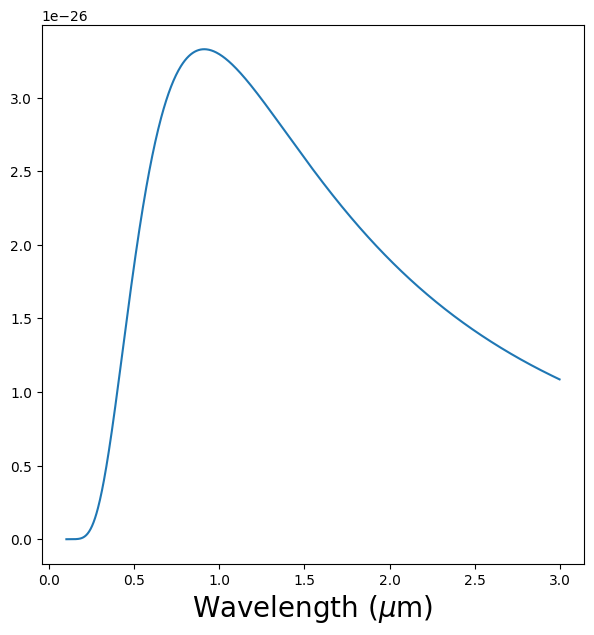

In [2]:
import matplotlib.pyplot as plt
import astropy.constants as ac
import astropy.units as u
def Bnu(T,nu):
    return (2*ac.h*nu**3) / (ac.c**2 * (np.exp(ac.h*nu/(ac.k_B*T))-1))

T = 5600 * u.K
wl = np.linspace(0.1,3,1000) * u.micron
nu = ac.c / wl # convert wl to freguency

B_plot = Bnu(T,nu)

fig,ax = plt.subplots(figsize=(7,7))
ax.plot(wl,B_plot)
ax.set_xlabel(r'Wavelength ($\mu$m)',fontsize=20)

In [3]:
B_plot

<Quantity [2.76070478e-33, 5.23007622e-33, 9.54467471e-33, 1.68308804e-32,
           2.87563091e-32, 4.77206498e-32, 7.70878904e-32, 1.21461502e-31,
           1.87002466e-31, 2.81788178e-31, 4.16208353e-31, 6.03392211e-31,
           8.59659536e-31, 1.20498680e-30, 1.66347838e-30, 2.26383233e-30,
           3.03978954e-30, 4.03055562e-30, 5.28118483e-30, 6.84291649e-30,
           8.77345521e-30, 1.11371876e-29, 1.40053298e-29, 1.74560008e-29,
           2.15742199e-29, 2.64518266e-29, 3.21873231e-29, 3.88856419e-29,
           4.66578408e-29, 5.56207312e-29, 6.58964426e-29, 7.76119319e-29,
           9.08984422e-29, 1.05890920e-28, 1.22727395e-28, 1.41548338e-28,
           1.62495991e-28, 1.85713690e-28, 2.11345184e-28, 2.39533949e-28,
           2.70422512e-28, 3.04151796e-28, 3.40860470e-28, 3.80684337e-28,
           4.23755739e-28, 4.70202997e-28, 5.20149889e-28, 5.73715160e-28,
           6.31012077e-28, 6.92148013e-28, 7.57224087e-28, 8.26334835e-28,
           8.99567927e-28

In [4]:
B_plot.to(u.erg/u.s/u.cm**2/u.Hz)

<Quantity [2.76070478e-12, 5.23007622e-12, 9.54467471e-12, 1.68308804e-11,
           2.87563091e-11, 4.77206498e-11, 7.70878904e-11, 1.21461502e-10,
           1.87002466e-10, 2.81788178e-10, 4.16208353e-10, 6.03392211e-10,
           8.59659536e-10, 1.20498680e-09, 1.66347838e-09, 2.26383233e-09,
           3.03978954e-09, 4.03055562e-09, 5.28118483e-09, 6.84291649e-09,
           8.77345521e-09, 1.11371876e-08, 1.40053298e-08, 1.74560008e-08,
           2.15742199e-08, 2.64518266e-08, 3.21873231e-08, 3.88856419e-08,
           4.66578408e-08, 5.56207312e-08, 6.58964426e-08, 7.76119319e-08,
           9.08984422e-08, 1.05890920e-07, 1.22727395e-07, 1.41548338e-07,
           1.62495991e-07, 1.85713690e-07, 2.11345184e-07, 2.39533949e-07,
           2.70422512e-07, 3.04151796e-07, 3.40860470e-07, 3.80684337e-07,
           4.23755739e-07, 4.70202997e-07, 5.20149889e-07, 5.73715160e-07,
           6.31012077e-07, 6.92148013e-07, 7.57224087e-07, 8.26334835e-07,
           8.99567927e-07

단위 변환 불가 에러

```python
#에러 예문
B_plot.to(u.erg/u.s)
```

<img src = "D:/Astronomical Python/Img/chap 8_1.png" width="800" height="500"/>

무차원 상수 사용

```
#에러 예문
np.log10(T)
```

<img src = "D:/Astronomical Python/Img/chap 8_2.png" width="800" height="500"/>

- 여기서 T는 단위를 가진 객체
- value 값을 추출하여 사용하여 함

In [5]:
print(T)
print(T.value)

5600.0 K
5600.0


단위 변환 에러 (변환 불가)

```python
# 에러 예문
p = 2*u.arcsec
d = (1/p).to(u.kpc)
```

<img src = "D:/Astronomical Python/Img/chap 8_3.png" width="800" height="500"/>

$d = \frac{1}{p}$
* d is in parsec , p is in arcseconds

```python
d = p.to(u.kpc, equivalencies = u.parallax())
d
```

<img src = "D:/Astronomical Python/Img/chap 8_4.png" width="800" height="500"/>

In [7]:
nu = wl.to(u.Hz,equivalencies=u.spectral())

In [8]:
nu

<Quantity [2.99792458e+15, 2.91335278e+15, 2.83342162e+15, 2.75775935e+15,
           2.68603287e+15, 2.61794288e+15, 2.55321966e+15, 2.49161951e+15,
           2.43292173e+15, 2.37692592e+15, 2.32344969e+15, 2.27232675e+15,
           2.22340509e+15, 2.17654553e+15, 2.13162040e+15, 2.08851231e+15,
           2.04711323e+15, 2.00732350e+15, 1.96905106e+15, 1.93221075e+15,
           1.89672366e+15, 1.86251658e+15, 1.82952148e+15, 1.79767506e+15,
           1.76691838e+15, 1.73719644e+15, 1.70845788e+15, 1.68065469e+15,
           1.65374194e+15, 1.62767753e+15, 1.60242197e+15, 1.57793817e+15,
           1.55419131e+15, 1.53114860e+15, 1.50877917e+15, 1.48705395e+15,
           1.46594550e+15, 1.44542792e+15, 1.42547675e+15, 1.40606885e+15,
           1.38718233e+15, 1.36879646e+15, 1.35089159e+15, 1.33344909e+15,
           1.31645128e+15, 1.29988136e+15, 1.28372338e+15, 1.26796217e+15,
           1.25258329e+15, 1.23757300e+15, 1.22291819e+15, 1.20860640e+15,
           1.19462571e+15

## 8.3 Cosmological Calculations

In [9]:
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

In [10]:
# cosmo에서 z = 으로 시작하는 키워드 인자 (keyword argument)는 
# 향후 위치 인자 (position argument)로 바뀔 예정임
cosmo.comoving_distance(0.55)

<Quantity 2080.47740748 Mpc>

In [11]:
cosmo.luminosity_distance(2.1)

<Quantity 16855.09481854 Mpc>

In [12]:
d_A = cosmo.angular_diameter_distance(0.8)
d_A

<Quantity 1574.62956404 Mpc>

In [13]:
((0.1*u.arcsec.to(u.rad))*d_A).to(u.pc)

<Quantity 763.40195533 pc>

## 8.4 Coordinates

In [14]:
from astropy.coordinates import SkyCoord
coordinate = SkyCoord.from_name('M81')
coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (148.8882194, 69.06529514)>

```python
#에러 예문
coordinate = SkyCoord.from_name('not-an-object')
```

<img src = "D:/Astronomical Python/Img/chap 8_4.png" width="800" height="500"/>

In [15]:
coordinate.to_string('hmsdms')

'09h55m33.17265565s +69d03m55.06250537s'

In [16]:
coordinate.galactic

<SkyCoord (Galactic): (l, b) in deg
    (142.09182236, 40.90005611)>

In [17]:
import astropy.units as u
offset_star = SkyCoord(ra=148.88917,dec=69.06114,unit='deg')

offset = offset_star.spherical_offsets_to(coordinate)
offsets = [i.to(u.arcsec) for i in offset]
offsets

[<Angle -1.22275264 arcsec>, <Angle 14.95851484 arcsec>]

## 8.5 Astroquery

## 8.6 Research Example: Automatic Offsets

In [18]:

from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
import numpy as np
class NoMatchesError(Exception):
    pass

def find_offset_star(target_coordinate:SkyCoord,
                     cone_radius:u.Quantity = 1*u.arcmin,
                     limiting_magnitude:float=15.0):
    j = Gaia.cone_search_async(target_coordinate, radius=cone_radius)
    r = j.get_results()
    r = r[r['phot_g_mean_mag']<limiting_magnitude]
    if len(r)==0:
        raise NoMatchesError('No stars match the search criteria.')
    star_coords = SkyCoord(ra=r['ra'],dec=r['dec'],unit='deg')
    all_separations = target_coordinate.separation(star_coords)
    ind = np.argmin(all_separations)
    best_star_coord = SkyCoord(ra=r['ra'][ind],dec=r['dec'][ind],unit='deg')
    final_offset = best_star_coord.spherical_offsets_to(target_coordinate)
    offsets_arcsec = [i.to(u.arcsec) for i in final_offset]
    return best_star_coord,offsets_arcsec

In [19]:
coord_star,os= find_offset_star(coordinate)

INFO: Query finished. [astroquery.utils.tap.core]


In [20]:
os

[<Angle 39.23849035 arcsec>, <Angle 4.08555925 arcsec>]

## 8.7 Research Example: Handling Astronomical Images

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

#open the file
hdu = fits.open('BookDatasets/HST_JWST/jwst_f277W_crop.fits')
# retrieve the image in the 0th extension and its header
image = hdu[0].data
header = hdu[0].header

In [22]:
image

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00111607,
         0.00206522,  0.0001615 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00274452,
         0.00243494, -0.00152842],
       [ 0.        ,  0.        ,  0.        , ...,  0.00552088,
         0.00611165, -0.00083287]], shape=(2000, 2000), dtype='>f4')

In [23]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 2000                                                  
EXTEND  =                    T                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               7252.5 / Pixel coordinate of reference point            
CRPIX2  =               3402.5 / Pixel coordinate of reference point            
PC1_1   =    -0.64678977951046 / Coordinate transformation matrix element       
PC1_2   =    -0.76266832969569 / Coordinate transformation matrix element       
PC2_1   =    -0.76266832969569 / Coordinate transformation matrix element       
PC2_2   =     0.646789779510

In [24]:
#close the image
hdu.close()

In [25]:
with fits.open('BookDatasets/HST_JWST/jwst_f277W_crop.fits') as hdu:
    image = hdu[0].data
    header = hdu[0].header

Text(0.5, 1.0, 'JWST image, plotted with no modifications to the color scaling')

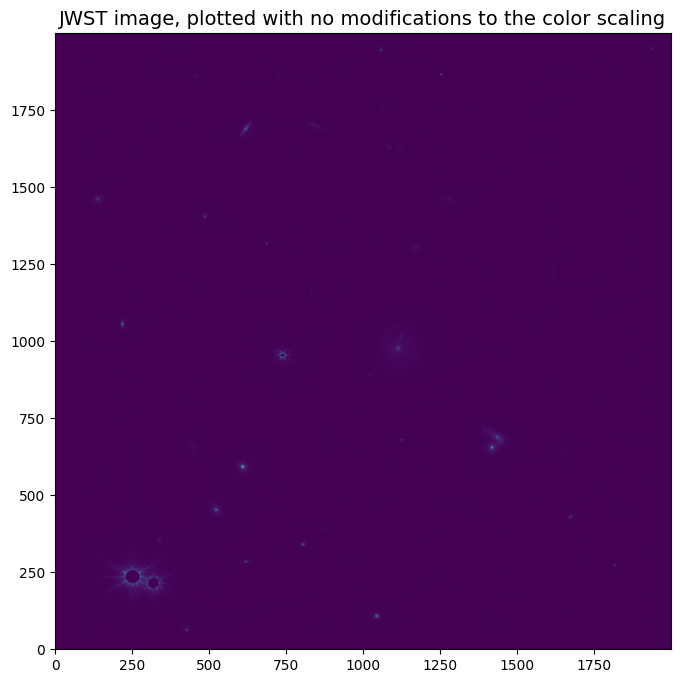

In [26]:
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(image, origin='lower')
ax.set_title("JWST image, plotted with no modifications to the color scaling", fontsize=14)

$$ V_{min} = \mu_{image} - s \times \sigma_{image} $$
$$ V_{max} = \mu_{image} + s \times \sigma_{image} $$

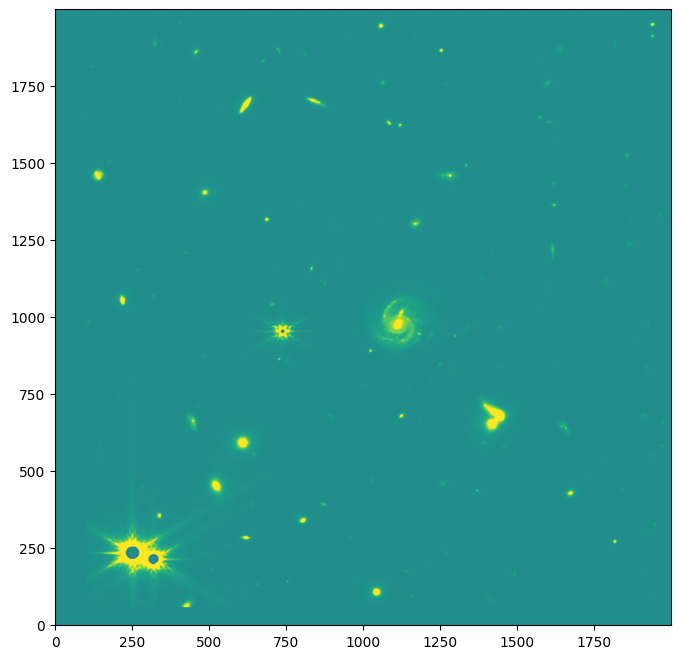

In [27]:
s = 5
vmin = np.mean(image) - s*np.std(image)
vmax = np.mean(image) + s*np.std(image)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image, vmin = vmin, vmax = vmax, origin = 'lower');

### 8.7.1 The World Coordinate System

In [28]:
from astropy.wcs import WCS

im_wcs = WCS(header)

Set OBSGEO-B to   -36.849188 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725785823.910 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


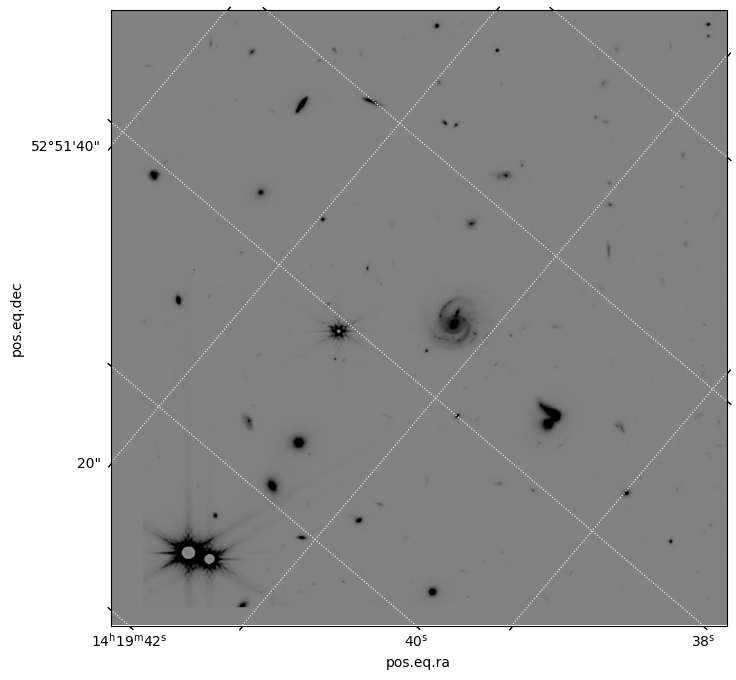

In [29]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': im_wcs})
ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin = 'lower')
ax.grid(color='white', ls='dotted')

In [30]:
ax

<WCSAxes: >

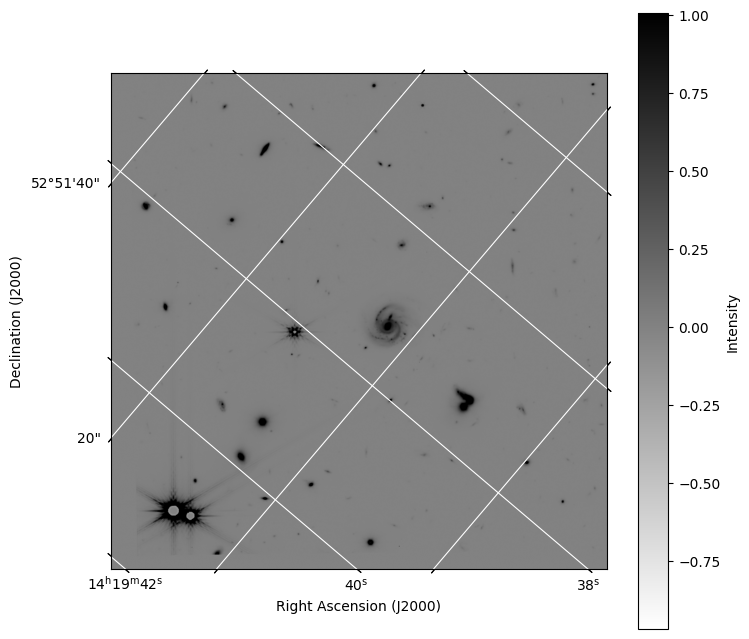

In [31]:
# 플롯 설정 및 이미지 그리기
fig, ax = plt.subplots(figsize=(8,8), subplot_kw={'projection': im_wcs})
im = ax.imshow(image, vmin=vmin, vmax=vmax, cmap='gray_r', origin = 'lower')

# 컬러바 추가
cbar = plt.colorbar(im)
cbar.set_label('Intensity')

# 격자 및 축 레이블 설정
ax.grid(color='white', ls='solid')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')


격자 정보 재확인

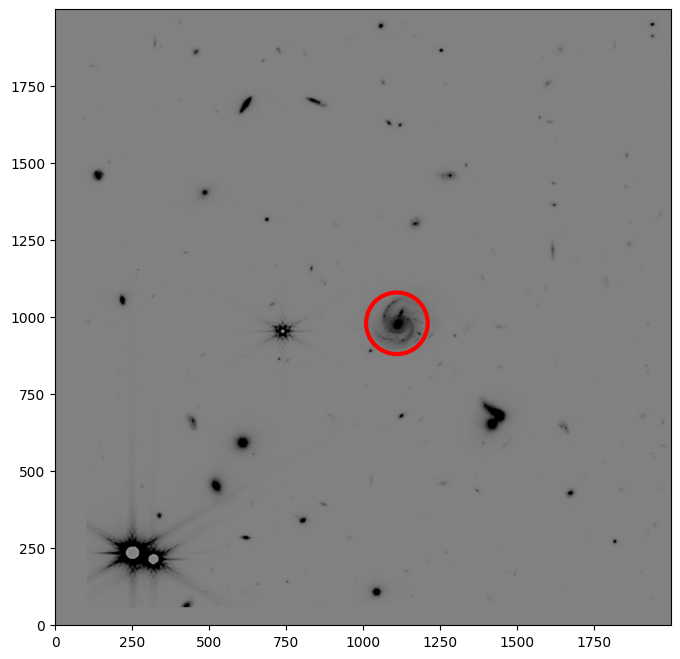

In [33]:
from photutils.aperture import CircularAperture

# define pixel aperture
aperture = CircularAperture([(1110, 980)], r =100)

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(image, vmin = vmin, vmax = vmax, cmap = 'gray_r', origin = 'lower')
aperture.plot(color = 'r', lw = 3)

In [34]:
aperture.to_sky(im_wcs)

<SkyCircularAperture(<SkyCoord (ICRS): (ra, dec) in deg
    [(214.9052996, 52.85095396)]>, r=2.999998303409702 arcsec)>

In [35]:
coord = aperture.to_sky(im_wcs).positions
coord.to_string('hmsdms')

['14h19m37.27190414s +52d51m03.43427078s']

### 8.7.2 Image Cutouts

In [36]:
from astropy.nddata import Cutout2D
import astropy.units as u

cutout = Cutout2D(data = image,
                  position = coord,
                  size = 12*u.arcsec,
                  wcs = im_wcs)

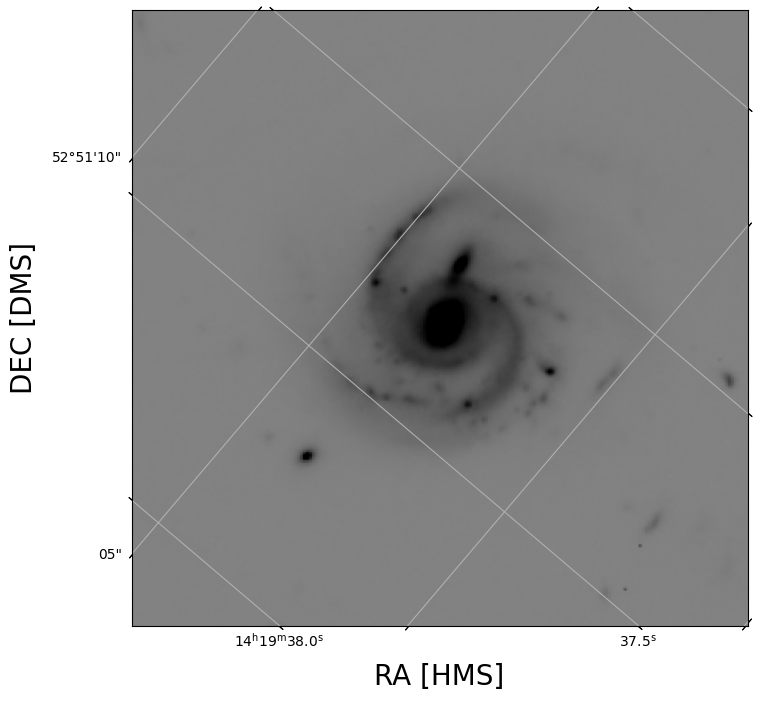

In [37]:
fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection': cutout.wcs})
ax.imshow(cutout.data,vmin=vmin,vmax=vmax,cmap='gray_r')
ax.set_xlabel('RA [HMS]',fontsize=20)
ax.set_ylabel('DEC [DMS]',fontsize=20)
ax.grid()

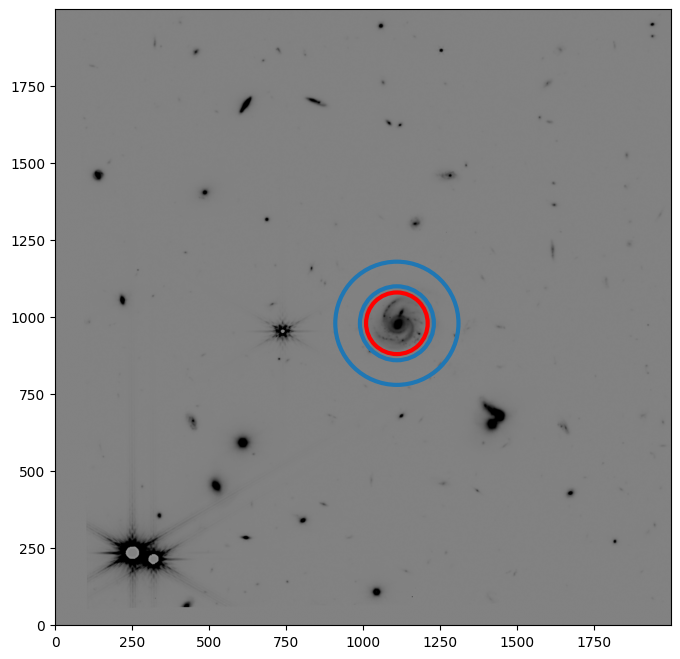

In [38]:
from photutils.aperture import CircularAnnulus

aperture = CircularAperture([(1110,980)],r=100)
bg_aperture = CircularAnnulus([(1110,980)],r_in=120,r_out=200)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image,vmin=vmin,vmax=vmax,cmap='gray_r',origin='lower')
aperture.plot(color='r',lw=3)
bg_aperture.plot(color='C0',lw=3)

In [39]:
from photutils.aperture import ApertureStats,aperture_photometry

phot_table = aperture_photometry(image,aperture)
flux = phot_table['aperture_sum'][0]
bg_stats = ApertureStats(image, bg_aperture)
bkg_mean = bg_stats.mean[0]
print(flux)
print(bkg_mean)

8312.259999858908
0.0074764478284599645


In [40]:
print(f'Aperture Area: {aperture.area:4f}')

final_flux = flux - bkg_mean*aperture.area
print(f'Final flux measurement: {final_flux:.3f}')

Aperture Area: 31415.926536
Final flux measurement: 8077.380


### 8.7.4 Combining Images

In [41]:
def load_and_cutout(band_name, coord, size):
    with fits.open(f'BookDatasets/HST_JWST/jwst_{band_name}_crop.fits') as hdu:
        image = hdu[0].data
        wcs = WCS(hdu[0].header)
    cutout = Cutout2D(data = image,
                position = coord,
                size = size,
                wcs = wcs)
    return cutout

f150w = load_and_cutout('f150W',coord=coord,size=12*u.arcsec)
f277w = load_and_cutout('f277W',coord=coord,size=12*u.arcsec)
f444w = load_and_cutout('f444W',coord=coord,size=12*u.arcsec)

Set OBSGEO-B to   -36.864348 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725861996.312 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.849188 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725785823.910 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -36.871979 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725899961.594 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


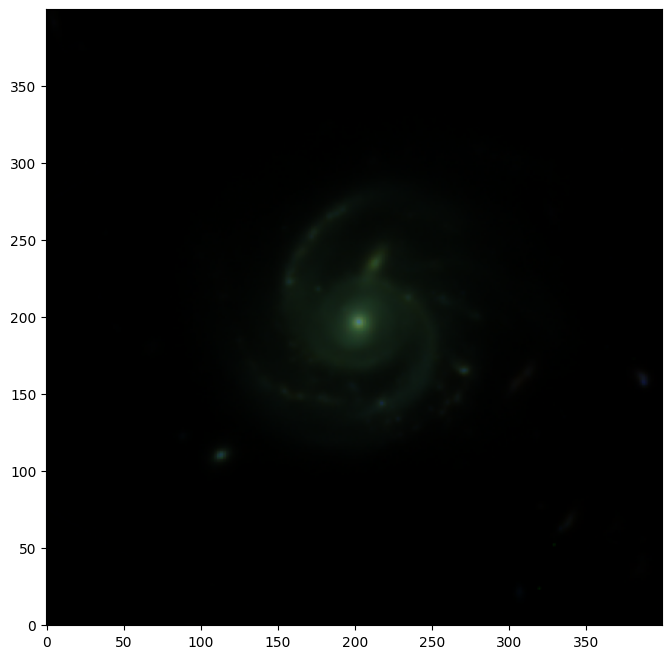

In [42]:
from astropy.visualization import make_lupton_rgb

rgb_image = make_lupton_rgb(f444w.data, f277w.data, f150w.data)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(rgb_image,origin='lower')
fig.savefig('imaging-just-color-1.pdf')

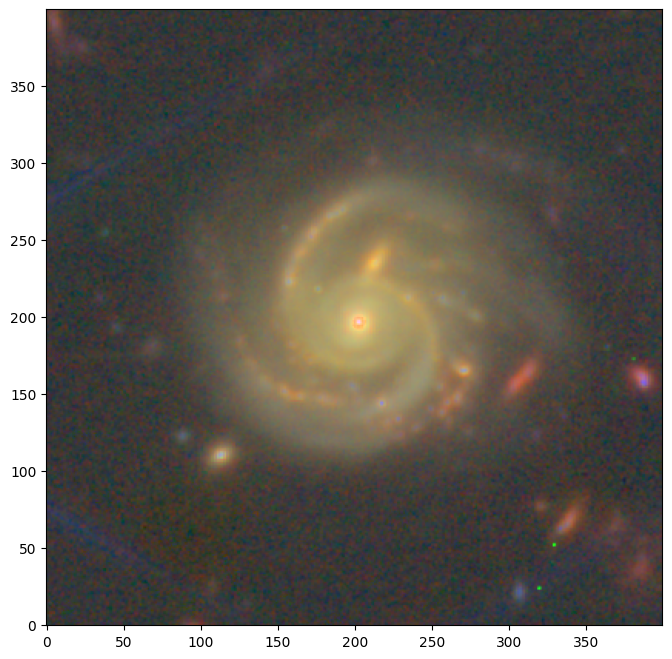

In [44]:
rgb_image = make_lupton_rgb(2.0*f444w.data,
                            f277w.data,
                            f150w.data,
                            minimum = np.mean(f277w.data)-0.5*np.std(f277w.data),
                            stretch = 0.1,
                            Q=9)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(rgb_image,origin='lower')

fig.savefig('imaging-just-color-2.pdf')

## 8.8 Summary